***This initial piece of code is basically connecting this google colab page with my google drive where I have stored my dataset.***

In [ ]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse


E: Package 'python-software-properties' has no installation candidate
E: Package 'module-init-tools' has no installation candidate


In [ ]:
#from google.colab import auth
#auth.authenticate_user()
#from oauth2client.client import GoogleCredentials
#creds = GoogleCredentials.get_application_default()
#import getpass
#!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
#vcode = getpass.getpass()
#!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
#!mkdir -p drive
#!google-drive-ocamlfuse drive

/usr/bin/xdg-open: 882: www-browser: not found
/usr/bin/xdg-open: 882: links2: not found
/usr/bin/xdg-open: 882: elinks: not found
/usr/bin/xdg-open: 882: links: not found
/usr/bin/xdg-open: 882: lynx: not found
/usr/bin/xdg-open: 882: w3m: not found
xdg-open: no method available for opening 'https://accounts.google.com/o/oauth2/auth?client_id=None&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force'
/bin/sh: 1: firefox: not found
/bin/sh: 1: google-chrome: not found
/bin/sh: 1: chromium-browser: not found
/usr/bin/open: 882: www-browser: not found
/usr/bin/open: 882: links2: not found
/usr/bin/open: 882: elinks: not found
/usr/bin/open: 882: links: not found
/usr/bin/open: 882: lynx: not found
/usr/bin/open: 882: w3m: not found
xdg-open: no method available for opening 'https://accounts.google.com/o/oauth2/auth?client_id=None&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&

***command to move to malaria directory where our files are present***

In [ ]:
%cd ./gdrive/My Drive/malaria
!ls

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-b8dc0039fd9b>", line 1, in <cell line: 1>
    get_ipython().run_line_magic('cd', './gdrive/My Drive/malaria')
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2418, in run_line_magic
    result = fn(*args, **kwargs)
  File "<decorator-gen-85>", line 2, in cd
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/magic.py", line 187, in <lambda>
    call = lambda f, *a, **k: f(*a, **k)
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/magics/osm.py", line 342, in cd
    oldcwd = os.getcwd()
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/intera

# Malaria Detection using CNN

In this project, I have done malaria detection using convolutional neural networks. As a model choice in deep CNN I have used Resnet50 model along with its trained weight. The Dataset that I have used in this model is from <span src ="https://www.kaggle.com/iarunava/cell-images-for-detecting-malaria">Kaggle website</span>.  I have done transfer learning with our pre-trained Resnet50 model, later on trained a small neural network accordingly to perform our binary classification task i.e. wether a cell is parasitized or it is uninfected. To do the project I have first divided the work in four tasks.
The four tasks are as follows:
- Importing the important dependencies
- Preprocessing tasks that includes feature extraction of image dataset using pre-trained Resnet50 model
- Training and Validation of our small neural network for binary classification
- Evaluation of our model


**Some of the definitions**


*   **Transfer Learning :**Transfer learning is a machine learning method where a model developed for a task is reused as the starting point for a model on a second task. It is a popular approach in deep learning where pre-trained models are used as the starting point on computer vision and natural language processing tasks given the vast compute and time resources required to develop neural network models on these problems and from the huge jumps in skill that they provide on related problems.We can use transfer learning to speed up training and improve the performance of our deep learning model.
*   **ResNet50 model : ** ResNet-50 is a convolutional neural network that is trained on more than a million images from the ImageNet database. The network is 50 layers deep and can classify images into 1000 object categories, such as keyboard, mouse, pencil, and many animals. As a result, the network has learned rich feature representations for a wide range of images.




**Approach used in this problem**

So the approach that I have used for solvig this Malaria detection problem is CNN on the dataset and Transfer learning.

So for the sake of easiest explanation for my approach, I would say that I am using transfer learning to solve this problem where I have got a pre-trained model ResNet50 with it's already trained weights. Now since this ResNet50 classifies an image into 50 classes but I have to classify an image into just 2 classes (wether an image is infected or not) so I removed very last layer of ResNet50 model and instead of that, I put my own classification layers to classify an image into two classes.

So, all the used layers of ResNet50 are basically extracting all the important features from our dataset images. After extraction of those features, I am passing them into my created neural Network(consisting of various Dense layer and different Relu and Softmax Activation Layes) and training the Network for optimized weights. Now, after training for optimized weights, my Network learnt to classify an image into two classes and Hence I got an Image classifier for binary classification.

**Why did I choose Transfer Learning**

The reason behind choosing transfer learning is that the limited capacity of CPU of normal computers can not handle training of deep CNN which consists of 50 or more than 50 layers.
Also entire training of the architecture of CNN even on GPU of Google Colab (which provides 12 GB RaM) will take a hell lot of time(might more than a day) or it can run out of RAM. So transfer learning basically comes with pre-trained weights and also since our problem resembles to the pre-trained model(classification of image) so most of the layers of pre-trained model will be doing our job of extracting features from image. So we can use all those layer to directly extract feature without training those layers for optimized weights.


**Why did I choose ResNet50 model **

In a study done by Rajaraman et al., they used pre-trained convolutional neural networks to classify images in the same dataset I am using. They compared six models: AlexNet, VGG-16, ResNet-50, Xception, DenseNet-121, and a custom model they built. Their results showed that the ResNet-50 model consistently showed the most accurate results on this specific database — it also had the highest performance in metrics such as MCC and the F-1 score.

**NOTE : ** Due to some internet issues and problem in uploading entire dataset on google drive, I basically could upload only 80% of the original dataset. So I have created this model with this much amount of dataset(which is pretty huge, almost 20,000 images). Among this 20,000 images, I have seperated them further into training, validation and testing datasets.

## Task 1: Importing the important dependencies
So firstly, I have chosen Keras as my framework. Accordingly, different functions and dependencies from Keras is imported for smooth running of my model. Some of the important imports are as follows:


*   Dump from pickle is used to store the object data to file.
*   shuffle from random basically shuffles the dataset  so that every row of the dataset must have a random label of parasitized or uninfected.

*   keras.applications.resnet50 does import resNet50 model for us that I shall be using as pre-trained model for my transfer learning purpose.
*   Adam optimizer is imported to optimize our weights and learning rates etc.


*   The ModelCheckpoint callback class allows us to define where to checkpoint the model weights,how the file should named and under what circumstances to make a checkpoint of the model.










In [ ]:
#!pip install tensorflow

In [ ]:
from os import listdir
from pickle import dump
from random import shuffle
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

import cv2
import copy

from tensorflow.keras.layers import Input, Dense, Convolution2D, MaxPooling2D, AveragePooling2D, ZeroPadding2D, Dropout, Flatten, Reshape, Activation, Lambda, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import initializers
#from tensorflow.keras import Input
from tensorflow.keras.layers import Layer
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import ModelCheckpoint
import sys

##Task 2: Preprocessing tasks for image feature extraction
Now here in the 2nd task, I decided to extract features from the available dataset and I shall be doing this by passing our dataset into pre-trained ResNet50 model. So, ResNet50 model has got 50 layers and classifies an image into 50 classes but I just want to classify into 2 class so I shall remove last layer here in this task and store all the extracted features from 49 layers into vectors. I shall do this for all training, validation and testing dataset. At the end of this task, I shall be having feature vectors of all training, validation and test data.
Further in the next task, these features will be passed into our created Neural Netwok to train that network and classify an image.



<strong>creating a list containing names of images with their corresponding label</strong>

In [ ]:
#blank list created
dataset = list()
n = [0]

In [ ]:
#function for extracting image name from dataset then putting the corresponding label and finally putting into above created list
def func(directory, label):
    for name in listdir(directory):
        filename = directory + '/' + name
        lis = [filename, label]
        dataset.append(lis)
        n[0] = n[0]+1

In [ ]:
main_directory = 'dataset'
func(main_directory+'/Parasitized', [1, 0])
func(main_directory+'/Uninfected', [0, 1])
#shuffling the orderly stored image into list to randomize them
shuffle(dataset)
n[0]

19852

<strong>We have used 80% of dataset as training, 10% as validation and 10% as testing.</strong>

In [ ]:
train = int(0.8*n[0])
dev = int(0.1*n[0])
test = int(0.1*n[0])

In [ ]:
train_dataset = dataset[:train]
dev_dataset = dataset[train: train+dev]
test_dataset = dataset[train+dev:]

In [ ]:
print("No. of train data points: ", len(train_dataset))
print("No. of dev data points: ",len(dev_dataset))
print("No. of test data points: ",len(test_dataset))

No. of train data points:  15881
No. of dev data points:  1985
No. of test data points:  1986


<strong>Blank feature list for storing the image features that will be generated from our pre-trained Resnet50 model after a single feed-forward task. </strong>

In [ ]:
feature_train =  list()
label_train = list()
feature_dev =  list()
label_dev = list()
feature_test =  list()
label_test = list()

<strong>Using a Resnet50 model from keras with weights downloaded from kaggle website and removing last layer. </strong>

We have removed the last layer( i.e. softmax layer with 1000 hidden units or neurons) in the original Resnet50 model and so our output will be the output vector generated by a previous layer before the last layer of Resne50. Here, in the transfered Resnet50 model the output generated will be a vector of size 2048.

By using the **feature_extaction()** function discussed below we will find out the feature vector associated with every image into our train, test and dev set and store them in the lists declared just above.

In [ ]:
#using ResNet50 model with their weights
#model = ResNet50(weights='resnet50_weights_tf_dim_ordering_tf_kernels.h5')
model = ResNet50(include_top = True, weights = 'imagenet')
#poping up or removing last layer using model.layers.pop() doesnt work now!!
#model.layers.pop()
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

** Extracting features of Images using the Transferred Resnet50 model.**




Here, I am extracting features from images using Transferred ResNet50. The output vector generated by the transferred layer contains the image feature information and is futher stored in their corresponding lists.

In [ ]:
def extract_features(dataset, name):

    i = 1;
    for filename, label in dataset:

        #loading the image
        img = image.load_img(filename, target_size=(224,224))
        #converting image to array
        x = image.img_to_array(img)
        #expanding the dimension
        x = np.expand_dims(x, axis=0)
        #preprocessing for Resnet50 model input
        x = preprocess_input(x)

        # get features
        feature = model.predict(x)

        #for train
        if name =='train':
            feature_train.append(feature)
            label_train.append(label)
        # for dev
        elif name =='dev':
            feature_dev.append(feature)
            label_dev.append(label)
        #for test
        else:
            feature_test.append(feature)
            label_test.append(label)

        if i%100 == 0:
            print("completed: %s", i)

        i=i+1
    print("===============")


**Calling the extract_feature function for train, dev(validation), test**

In [ ]:
extract_features(train_dataset, 'train')
extract_features(dev_dataset, 'dev')
extract_features(test_dataset, 'test')

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 355ms/step
completed: %s 15000
1/1 [==============================] - 0s 201ms/step
completed: %s 15100
1/1 [==============================] - 0s 197ms/step
completed: %s 15200
1/1 [==============================] - 0s 362ms/step
completed: %s 15300
1/1 [==============================] - 0s 200ms/step
completed: %s 15400
1/1 [==============================] - 0s 210ms/step
completed: %s 15500
1/1 [==============================] - 0s 209ms/step
completed: %s 15600
1/1 [==============================] - 0s 202ms/step
completed: %s 15700
1/1 [==============================] - 0s 357ms/step
completed: %s 15800
1/1 [==============================] - 0s 211ms/step
completed: %s 100
1/1 [==============================] - 0s 343ms/step
completed: %s 200
1/1 [==============================] - 0s 199ms/step
completed: %s 300
1/1 [==============================] - 0s 198ms/step
completed: %s 400
1/1 [===

**Storing the feature extracted and their corresponding labels to our hard-disk**

In [ ]:
import pickle

In [ ]:
pickle.dump(feature_train, open('./data/feature_train.pkl', 'wb'))
pickle.dump(label_train, open('./data/label_train.pkl', 'wb'))
pickle.dump(feature_dev, open('./data/feature_dev.pkl', 'wb'))
pickle.dump(label_dev, open('./data/label_dev.pkl', 'wb'))
pickle.dump(feature_test, open('./data/feature_test.pkl', 'wb'))


NameError: ignored

In [ ]:
pickle.dump(label_test, open('./data/label_test.pkl', 'wb'))

**Convert the feature and label list to numpy array and reshape it accordingly as is we shall be requiring it to pass as an input to our small neural network, especially modelled for our classification task. **

In [ ]:
X_train = np.array(feature_train).reshape((train, 2048))
Y_train = np.array(label_train)

ValueError: ignored

In [ ]:
X_dev = np.array(feature_dev).reshape((dev, 2048))
Y_dev = np.array(label_dev)

ValueError: ignored

In [ ]:
test = 1986
X_test = np.array(feature_test)
X_test.shape

(1986, 1, 4, 4, 2048)

In [ ]:
X_test = np.array(feature_test).reshape((test, 2048))
Y_test = np.array(label_test)

ValueError: ignored

In [ ]:
X_train.shape

(15881, 2048)

## Task 3: Training and validation of our Neural Network for the binary classification task.

Input given to this model will be the feature vector that is generated from our transferred Resnet50 model. Here, in this model named <b>malaria_model</b> we have used 3 dense layers. First two are hidden dense layers and the last is output softmax layer with two hidden units. Our input is passed to the first hidden layer with hidden units equal to 120, and then the second hidden layer with the number of hidden units equal to 10 and finally the output layer with 2 units for binary classification. In the process the  ***total number of parameters( i.e. weights and bias values that we are optimizing) that will be trained is 2,47,112***. Also I have used **relu** as an activation function for our first two layers and softmax for last layer.These activation functions basically introduces non-linearity in our classification function and this non-linearity is very important as it saves our Neural Network from becoming a normal regression model. I have used **Adam optimizer** for fast optimization of weights and the loss function that I have used is  **categorical_crossentropy**.

**Why did I choose *categorical_crossentropy* as loss function**

So, basically for binary cassification problems, we either choose Hinge loss or categorical_crossentropy as our loss function. Hinge loss is generally preffered in SVM problems where the target values are in the set {-1, 1}. While Cross entropy is one of ancestor probabilistic decision making where the target values are in the set {0, 1}. Now Hinge loss simplifies the mathematics needed for SVM thus leading to computational effective results while maximazing the error. If we need real time decisions with a lesser accuracy then we depend on it. But Cross entropy minimizes the error but computationally ineffective.

$$Loss = -\sum_{i =1}^{c}ylog\hat{y}+(1-y)log(1-\hat{y})$$


So since I am working on a health sector problem where accuracy is more important than computational effectiveness hence I preffered *binary_crossentropy* as loss function.

During our model fitting process we have used **100 epochs** to train our weights with **batch size of 200** image feature vector. We have used a **callback to maintain the checkpoint** to save our model as it get improved on validation loss.

**What loss function and callback are doing together**

We have used the batch size of 200 (i.e. 200 image feature vectors will be given as an input in one forward-pass), which will be given as an input to our malaria_model in one forward-pass and then backpropagation will do its job by optimizing the weights. Then when all our train image feature vector is passed through the model  i.e. it will be 1 epoch.
Basically every 1 epoch of training dataset is optimising weight for our malaria_model. And then after, we are checking our newly optimized weights on validation dataset with the help of loss function( loss function that we have used here is **categorical_crossentropy**). So, if error is minimized comparing to the previous iteration on validation dataset then callback is saving our model with newly optimized weight named as ***model.h5***, if loss on our validation data is not minimized with respect to previous iteration then we do not save these new weights and confine ourselves with previous model and weights only. And for tthis, the parameter that we have used in our **model.fit()** is **callback()**.

In [ ]:
#creating our own Neural Network
def malaria_model(input_shape):

    X_input = Input(input_shape)

    X = Dense(120, activation = 'relu', name = 'fc0')(X_input)
    X = Dense(10, activation = 'relu', name ='fc1')(X)
    X = Dense(2, activation = 'softmax', name = 'softmax')(X)

    model = Model(inputs = X_input, outputs = X, name = "malaria_detection")

    return model

In [ ]:
model = malaria_model((X_train.shape[1],))

In [ ]:
model.compile(optimizer = 'adam', loss ='categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
filename = 'model.h5'
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [ ]:
model.fit(x = X_train, y = Y_train, epochs = 100, batch_size = 200, validation_data=(X_dev, Y_dev), callbacks=[checkpoint])

Train on 15881 samples, validate on 1985 samples
Epoch 1/100
15881/15881 [==============================] - 1s 33us/step - loss: 0.1197 - acc: 0.9560 - val_loss: 0.1306 - val_acc: 0.9531

Epoch 00001: val_loss improved from 0.13567 to 0.13061, saving model to model.h5
Epoch 2/100
15881/15881 [==============================] - 1s 33us/step - loss: 0.1145 - acc: 0.9581 - val_loss: 0.1399 - val_acc: 0.9491

Epoch 00002: val_loss did not improve from 0.13061
Epoch 3/100
15881/15881 [==============================] - 1s 34us/step - loss: 0.1196 - acc: 0.9543 - val_loss: 0.1261 - val_acc: 0.9526

Epoch 00003: val_loss improved from 0.13061 to 0.12614, saving model to model.h5
Epoch 4/100
15881/15881 [==============================] - 1s 34us/step - loss: 0.1175 - acc: 0.9563 - val_loss: 0.1403 - val_acc: 0.9466

Epoch 00004: val_loss did not improve from 0.12614
Epoch 5/100
15881/15881 [==============================] - 1s 35us/step - loss: 0.1149 - acc: 0.9573 - val_loss: 0.1336 - val_acc: 

## Task 4: Model Evaluation

Now, in our last task, I worked on different accuracies that I got through this model.

We evaluated the trained malaria model on test data and got an **accuracy of approx. 95.01%**.

Also, I chose **precision and recall** as evaluation metric because in diesease detection problem, its very important to have a look on how many correct predictions we are doing out of total predictions.  So, since **f1 score** gives us a single numeric value, so we calculated that one also.

$$precision = \frac{(true\ positive)}{(total\ pridicted\ positive)}$$

$$recall = \frac{(true\ positive)}{(total\ actual\ positive)}$$

$$f1 score = \frac{(2*recall*precision)}{(precision+recall)}$$


Lastly, we plotted ROC curve also just to visualise our results.

In [ ]:
pred = model.evaluate(x = X_test, y = Y_test)

1986/1986 [==============================] - 0s 76us/step


In [ ]:
#checking accuracy on test data
print("Accuracy: ", pred[1])

Accuracy:  0.9501510574018127


**Evaluation using f1_score and confusion matrix**

*Importing sklearn functions for f1_score and confusion matrix*



In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

*Predicting on X_test and certain preprocessing for evaluation*

In [ ]:
p = model.predict(X_test)

In [ ]:
pred_label = np.matrix.round(p)
pred_label.shape

(1986, 2)

In [ ]:
prediction = pred_label[:,0]
actual = Y_test[:,0]

***Confusion Matrix for test data***

In [ ]:
#plotting confusion matrix
results = confusion_matrix(actual, prediction)
results

array([[927,  48],
       [ 51, 960]])

***f1_score for test data***

In [ ]:
#printing f1-score
print(f1_score(actual, prediction))

0.950965824665676


**ROC curve plot**

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [ ]:
y = actual
scores = p[:,0]
fpr, tpr, _ = roc_curve(y, scores, pos_label = 0)

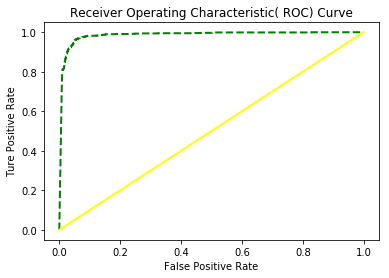

In [ ]:
plt.figure()
plt.plot(tpr, fpr, color = 'green', lw =2, linestyle = '--')
plt.plot([0, 1], color = 'yellow', lw =2, linestyle = '-')
plt.ylabel('Ture Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver Operating Characteristic( ROC) Curve')
plt.show()